In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [94]:
#reading and copying csv files
my_df = pd.read_csv("Train.csv")
new_train = my_df.copy(deep = True)

test_df = pd.read_csv("Test.csv")
new_test = test_df.copy(deep = True)

#cleaning up non-integer data into integers (data preprocessing)
new_train = new_train.drop(new_train.columns[0], axis = 1)
new_train["Mileage"] = new_train["Mileage"].str.rstrip("kmpl")
new_train["Engine"] = new_train["Engine"].str.rstrip("CC")
new_train["Power"] = new_train["Power"].str.rstrip("bhp")
new_train["Power"] = new_train["Power"].apply(lambda x:np.nan if x == "null "else x) #replacing null values with nan
new_train["Owner_Type"] = new_train["Owner_Type"].apply(lambda x: 1 if x=="First" else 2 if x=="Second" else 3 if x=="Third" else 4)
new_train["Transmission"] = new_train["Transmission"].apply(lambda x: 1 if x=="Manual" else 0)
new_train["Fuel_Type"] = new_train["Fuel_Type"].apply(lambda x: 0 if x=="Petrol" else 1 if x=="Diesel" else 2)
new_train = pd.get_dummies(new_train, columns = ["Location"],prefix = "",prefix_sep="", dtype = "int")

#drop all rows with NaN values
new_train = new_train.dropna()

new_train["Mileage"] = new_train["Mileage"].astype("float64")
new_train["Engine"] = new_train["Engine"].astype("float64")
new_train["Power"] = new_train["Power"].astype("float64")



In [95]:
new_train

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,Tata Tiago 1.2 Revotron XZ WO Alloy,2017,16500,0,1,1,23.84,1199.0,84.00,5.0,...,0,0,0,0,1,0,0,0,0,0
1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,2017,47357,1,0,1,18.49,1493.0,100.00,7.0,...,0,0,0,0,0,0,1,0,0,0
2,Skoda Rapid 2013-2016 1.6 MPI Ambition,2014,35000,0,1,1,15.00,1598.0,103.52,5.0,...,0,0,0,0,0,0,0,0,1,0
3,Tata Indica V2 DLS BSII,2007,200000,1,1,2,17.20,1396.0,53.50,5.0,...,0,0,0,0,0,1,0,0,0,0
4,Tata Manza Club Class Quadrajet90 LX,2013,64000,1,1,2,21.02,1248.0,88.76,5.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,BMW X5 3.0d,2009,150000,1,0,1,11.00,2993.0,235.00,5.0,...,0,1,0,0,0,0,0,0,0,0
3746,Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV,2012,85000,1,0,1,11.79,2179.0,120.00,7.0,...,0,0,0,1,0,0,0,0,0,0
3747,Maruti Wagon R LXI BSII,2007,55100,0,1,1,18.90,998.0,67.10,5.0,...,0,0,0,0,0,0,0,0,0,0
3748,Renault Duster 85PS Diesel RxL,2014,77500,1,1,1,20.45,1461.0,83.80,5.0,...,0,0,0,0,1,0,0,0,0,0


In [96]:
#cleaning up non-integer data into integers (data preprocessing)
new_test = new_test.drop(new_test.columns[0], axis = 1)
new_test["Mileage"] = new_test["Mileage"].str.rstrip("kmpl")
new_test["Engine"] = new_test["Engine"].str.rstrip("CC")
new_test["Power"] = new_test["Power"].str.rstrip("bhp")
new_test["Power"] = new_test["Power"].apply(lambda x:np.nan if x == "null "else x) #replacing null values with nan
new_test["Owner_Type"] = new_test["Owner_Type"].apply(lambda x: 1 if x=="First" else 2 if x=="Second" else 3 if x=="Third" else 4)
new_test["Transmission"] = new_test["Transmission"].apply(lambda x: 1 if x=="Manual" else 0)
new_test["Fuel_Type"] = new_test["Fuel_Type"].apply(lambda x: 0 if x=="Petrol" else 1 if x=="Diesel" else 2)
new_test = pd.get_dummies(new_test, columns = ["Location"],prefix = "",prefix_sep="", dtype = "int")

#drop all rows with NaN values
new_test = new_test.dropna()

new_test["Mileage"] = new_test["Mileage"].astype("float64")
new_test["Engine"] = new_test["Engine"].astype("float64")
new_test["Power"] = new_test["Power"].astype("float64")

In [97]:
#now we standardize the data. we prefer standardization over normalization for this set as there is an outlier (electric)

X_train = new_train.copy(deep = True)
y_train = X_train["Price"].copy(deep = True)
X_train = X_train.drop(["Price","Name"], axis = 1)
X_test = new_test.copy(deep = True)
y_test = X_test["Price"].copy(deep = True)
X_test = X_test.drop(["Price","Name"], axis = 1)

#features which need to be standardized
std_features = ['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission','Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
for i in std_features:
    X_train[i] = (X_train[i] - X_train[i].mean())/X_train[i].std() #feature scaling
    X_test[i] = (X_test[i] - X_test[i].mean())/X_test[i].std()

In [98]:
X_train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,1.127269,-1.020251,-1.078282,0.641477,-0.432921,1.316366,-0.711259,-0.546072,-0.351374,0,0,0,0,0,1,0,0,0,0,0
1,1.127269,-0.255071,0.927147,-1.558475,-0.432921,0.068488,-0.223363,-0.251070,2.121461,0,0,0,0,0,0,0,1,0,0,0
2,0.176632,-0.561495,-1.078282,0.641477,-0.432921,-0.745549,-0.049114,-0.186170,-0.351374,0,0,0,0,0,0,0,0,0,1,0
3,-2.041520,3.530111,0.927147,0.641477,1.820615,-0.232403,-0.384335,-1.108418,-0.351374,0,0,0,0,0,0,1,0,0,0,0
4,-0.140247,0.157636,0.927147,0.641477,1.820615,0.658606,-0.629943,-0.458309,-0.351374,0,0,0,0,0,0,0,0,0,1,0


In [130]:
X_test.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,-0.166278,0.118047,0.880825,0.665608,-0.433288,1.236734,-0.679771,-0.801440,-0.381061,0,0,0,0,0,1,0,0,0,0,0
1,-0.483790,0.001074,-1.134371,-1.501158,-0.433288,-0.287738,-0.767349,-0.704491,-0.381061,0,0,0,0,1,0,0,0,0,0,0
2,1.103767,-0.131549,-1.134371,0.665608,-0.433288,0.102244,-0.767349,-0.645925,-0.381061,0,0,0,0,0,0,0,1,0,0,0
3,-0.801301,0.239872,0.880825,-1.501158,-0.433288,-1.103152,1.298475,1.988335,-0.381061,0,0,0,0,0,0,0,0,0,0,1
4,-0.166278,-0.011118,-1.134371,0.665608,-0.433288,0.518223,-0.767349,-0.704491,-0.381061,0,0,0,0,1,0,0,0,0,0,0


In [131]:
y_train

0        5.00
1        8.37
2        4.50
3        0.85
4        2.65
        ...  
3745    18.75
3746     6.25
3747     1.45
3748     6.60
3749     2.35
Name: Price, Length: 3649, dtype: float64

In [102]:
y_test

0        6.95
1        2.90
2        6.28
3       13.80
4        2.75
        ...  
1245     6.80
1246     0.80
1247     8.27
1248     6.00
1249     9.51
Name: Price, Length: 1224, dtype: float64

In [108]:
# R-Squared is the measure of good fit of the linear regression line we make/may be called accuracy as well
def r2_score(y_true, y_pred):
   
    total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
    explained_variance = np.sum((y_pred - y_true) ** 2)
    r2 = 1 - (explained_variance / total_variance)
    return r2 * 100  # percentage

In [103]:
w = np.zeros(X_train.shape[1])
b = 0

def cost(x,y,weight,bias): #cost function calculation
    cost_sum = 0
    m = x.shape[0]
    for i in range(m):
        f_wb_i = np.dot(weight,x.iloc[i]) + bias
        cost = (f_wb_i - y.iloc[i])**2
        cost_sum += cost

    return cost_sum/(2*m)

In [104]:
def compute_gradient(x,y,w,b): #calculate partial derivative terms in gradient descent algorithm
    dj_dw_i = np.zeros(x.shape[1])
    dj_dw = np.zeros(x.shape[1])
    dj_db_i = 0
    dj_db = 0
    m = x.shape[0]
    for i in range(m):
        dj_dw_i = ((np.dot(w,x.iloc[i]) + b) - y.iloc[i])*x.iloc[i]
        dj_dw += dj_dw_i
        dj_db_i = (np.dot(w,x.iloc[i]) + b) - y.iloc[i]
        dj_db += dj_db_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw,dj_db
    

In [112]:
def gradient_descent(x,y,w,b,alpha,iterations):
    init_cost = cost(x,y,np.zeros(x.shape[1]),0)
    m = x.shape[0]
    J_hist = [init_cost] #first value when w and b are 0
    for i in range(iterations):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w = w-alpha*dj_dw
        b = b-alpha*dj_db
        J_hist.append(cost(x,y,w,b))
        pred_list = []
        for j in range(m): #creating list of predictions for each value of w,b
            pred = np.dot(w,x.iloc[j]) + b
            pred_list.append(pred)
        print(f"Iteration : {i}\t R^2 Score : {r2_score(y,pred_list)}") #r2 score for train.csv
        
        

    return w,b,J_hist

iterations = 100
w_final,b_final,J_hist = gradient_descent(X_train,y_train,w,b,0.6,iterations) #learning rate taken through trial and error


Iteration : 0	 R^2 Score : 30.26788030917601
Iteration : 1	 R^2 Score : 48.25654313418681
Iteration : 2	 R^2 Score : 55.91879773427648
Iteration : 3	 R^2 Score : 60.517499338103576
Iteration : 4	 R^2 Score : 63.52742870463326
Iteration : 5	 R^2 Score : 65.53794825131851
Iteration : 6	 R^2 Score : 66.89213000692934
Iteration : 7	 R^2 Score : 67.81097631840454
Iteration : 8	 R^2 Score : 68.43991509653009
Iteration : 9	 R^2 Score : 68.8751295360852
Iteration : 10	 R^2 Score : 69.18036749689418
Iteration : 11	 R^2 Score : 69.39795303020557
Iteration : 12	 R^2 Score : 69.55604144119603
Iteration : 13	 R^2 Score : 69.67340775569288
Iteration : 14	 R^2 Score : 69.76261009873514
Iteration : 15	 R^2 Score : 69.83208105261018
Iteration : 16	 R^2 Score : 69.88751129578169
Iteration : 17	 R^2 Score : 69.93276573287599
Iteration : 18	 R^2 Score : 69.97049061493881
Iteration : 19	 R^2 Score : 70.00251629445611
Iteration : 20	 R^2 Score : 70.0301247401924
Iteration : 21	 R^2 Score : 70.05422749675351

In [132]:
print(J_hist) #from the history of cost we see it keeps decreasing, so accuracy increases

[109.99423643463955, 44.32114405411296, 32.887702478794274, 28.017638419138944, 25.09474266967968, 23.18165708389579, 21.903787906143354, 21.043081463660453, 20.459070538493606, 20.059322383552747, 19.7827037757222, 19.588697115781596, 19.450401595600276, 19.34992194192189, 19.275324907513927, 19.218628654575276, 19.17447350529937, 19.13924251270301, 19.110479176174053, 19.086501560984072, 19.066146310611412, 19.04859861657869, 19.033279108862835, 19.019768466831326, 19.007757048735044, 18.997011132252364, 18.987350197942458, 18.978631565575615, 18.970739936137843, 18.963580215108394, 18.957072537620366, 18.951148777306397, 18.945750060163864, 18.940824963743104, 18.936328187557955, 18.93221955084326, 18.92846322055302, 18.92502710369255, 18.921882358942796, 18.91900299652789, 18.91636554469332, 18.913948767533455, 18.911733423238193, 18.90970205479952, 18.90783880727038, 18.906129267106206, 18.904560320133506, 18.903120025425626, 18.90179750289569, 18.90058283282062, 18.89946696580894

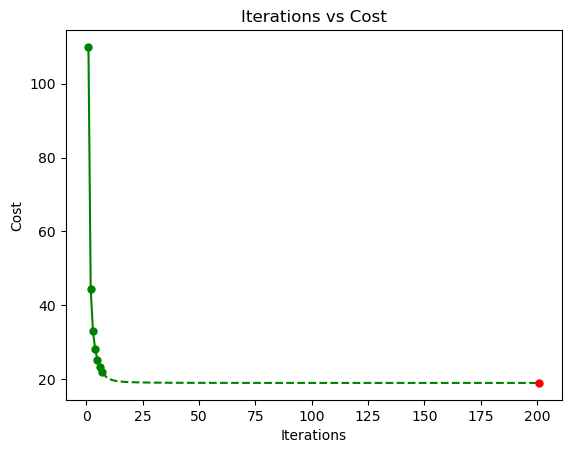

In [45]:
plt.plot(np.arange(1,iterations+2)[:7],J_hist[:7],color = 'green', marker ='o', markersize = 5) #plots first few points
plt.plot(np.arange(1,iterations+2)[6:],J_hist[6:],color = 'green',linestyle = "--")
plt.plot(np.arange(1,iterations+2)[-1],J_hist[-1],color = 'red', marker ='o', markersize = 5) #plots last point

plt.title("Iterations vs Cost", fontdict = {'fontsize':12})
plt.xlabel("Iterations")
plt.ylabel("Cost")

plt.show()

In [120]:
m_test = X_test.shape[0]
y_pred_test = []
for j in range(m_test):
    pred = np.dot(w_final,X_test.iloc[j]) + b_final
    y_pred_test.append(pred)
    print(f"sample number : {j}\t actual value : {y_test.iloc[j]}\t prediction : {pred}\t")

sample number : 0	 actual value : 6.95	 prediction : 4.8842858301151795	
sample number : 1	 actual value : 2.9	 prediction : 2.5693036582402993	
sample number : 2	 actual value : 6.28	 prediction : 5.916078174075793	
sample number : 3	 actual value : 13.8	 prediction : 24.998449545604622	
sample number : 4	 actual value : 2.75	 prediction : 0.19706266702468866	
sample number : 5	 actual value : 11.5	 prediction : 18.608105199831996	
sample number : 6	 actual value : 5.1	 prediction : 2.9873607070749184	
sample number : 7	 actual value : 35.5	 prediction : 30.951611403763977	
sample number : 8	 actual value : 50.5	 prediction : 36.77646229203022	
sample number : 9	 actual value : 4.7	 prediction : 3.9292531154623243	
sample number : 10	 actual value : 2.6	 prediction : 1.1473157587061138	
sample number : 11	 actual value : 2.75	 prediction : 1.7017490461089446	
sample number : 12	 actual value : 7.22	 prediction : 7.956606409059502	
sample number : 13	 actual value : 52.0	 prediction : 

In [118]:
print(b_final) #final bias after gradient descent
print(w_final) #final weight after gradient descent

8.810983227858799
Year                 2.937382
Kilometers_Driven   -1.021404
Fuel_Type            1.437518
Transmission        -1.165629
Owner_Type          -0.110940
Mileage             -0.982307
Engine               0.560020
Power                6.432689
Seats               -0.735960
Ahmedabad           -0.000062
Bangalore            2.129566
Chennai              1.536222
Coimbatore           2.312804
Delhi               -0.588282
Hyderabad            2.614390
Jaipur               1.290866
Kochi                0.491763
Kolkata             -1.033655
Mumbai              -0.783171
Pune                 0.840542
Name: 0, dtype: float64


In [129]:
print("final R^2 score of train.csv : 70.28471879921534")
print(f"final R^2 score of test.csv  : {r2_score(y_test,y_pred_test)}")

final R^2 score of train.csv : 70.28471879921534
final R^2 score of test.csv  : 67.81723576896678
